### SIMPLE RNN ARCHITECTURE 

In [1]:
import pandas as pd
import numpy as np

In [2]:
Data = pd.read_csv('CYBER.csv', encoding="latin-1")
Data.head()

,tweet_text,cyberbullying_type
0,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
1,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
2,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
3,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
4,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying


In [3]:
Data.tail()

,tweet_text,cyberbullying_type
31890,"Black ppl aren't expected to do anything, depe...",ethnicity
31891,Turner did not withhold his disappointment. Tu...,ethnicity
31892,I swear to God. This dumb nigger bitch. I have...,ethnicity
31893,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity
31894,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,ethnicity


In [4]:
Data['cyberbullying_type'].unique()

array(['not_cyberbullying', 'religion', 'age', 'ethnicity'], dtype=object)

In [5]:
Data.drop(Data.index[Data['cyberbullying_type'] == 'other_cyberbullying'], inplace=True)
Data.drop(Data.index[Data['cyberbullying_type'] == 'gender'], inplace=True)

In [6]:
Data['cyberbullying_type'].value_counts()

cyberbullying_type
religion             7998
age                  7992
ethnicity            7961
not_cyberbullying    7944
Name: count, dtype: int64

In [7]:
Data['tweet_text'] = Data['tweet_text'].apply(lambda x: x.lower() if pd.notna(x) else "")

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Data['cyberbullying_type'] = label_encoder.fit_transform(Data['cyberbullying_type'])

In [9]:
num_classes = len(label_encoder.classes_) 

In [10]:
x = Data['tweet_text']
y = Data['cyberbullying_type']

In [11]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y, num_classes=num_classes)

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
max_words = 10000  
max_sequence_length = 100

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)

In [15]:
x_train_sequences = tokenizer.texts_to_sequences(x_train)
x_test_sequences = tokenizer.texts_to_sequences(x_test)

In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train_padded = pad_sequences(x_train_sequences, maxlen=max_sequence_length)
x_test_padded = pad_sequences(x_test_sequences, maxlen=max_sequence_length)

In [17]:
embedding_dim = 100  
RNN_units = 128

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense

In [19]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Bidirectional(SimpleRNN(units=RNN_units, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(units=num_classes, activation='softmax'))

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_path = "SIMPLERNN.h5"

M = ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True, mode='max')

In [22]:
epochs = 10
batch_size = 32

In [23]:
model.fit(x_train_padded, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, callbacks=[M])

Epoch 1/10
718/718 [==============================] - ETA: 0s - loss: 0.8239 - accuracy: 0.6402
Epoch 1: accuracy improved from -inf to 0.64022, saving model to SIMPLERNN.h5
718/718 [==============================] - 97s 105ms/step - loss: 0.8239 - accuracy: 0.6402 - val_loss: 0.4586 - val_accuracy: 0.8742
Epoch 2/10
718/718 [==============================] - ETA: 0s - loss: 0.3388 - accuracy: 0.8943
Epoch 2: accuracy improved from 0.64022 to 0.89427, saving model to SIMPLERNN.h5
718/718 [==============================] - 78s 109ms/step - loss: 0.3388 - accuracy: 0.8943 - val_loss: 0.4109 - val_accuracy: 0.8840
Epoch 3/10
718/718 [==============================] - ETA: 0s - loss: 0.3083 - accuracy: 0.9073
Epoch 3: accuracy improved from 0.89427 to 0.90733, saving model to SIMPLERNN.h5
718/718 [==============================] - 77s 108ms/step - loss: 0.3083 - accuracy: 0.9073 - val_loss: 0.2351 - val_accuracy: 0.9373
Epoch 4/10
718/718 [==============================] - ETA: 0s - loss: 

In [24]:
y_pred = model.predict(x_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

200/200 [==============================] - 6s 20ms/step


In [25]:
from sklearn.metrics import accuracy_score

AC = accuracy_score(y_pred_classes,y_true_classes)

print("THE ACCURACY SCORE OF SIMPLE RNN ARCHITECTURE IS :",AC*100)

THE ACCURACY SCORE OF SIMPLE RNN ARCHITECTURE IS : 81.07853895594921


In [26]:
from sklearn.metrics import hamming_loss

HL = hamming_loss(y_pred_classes,y_true_classes)

print("THE HAMMING LOSS OF SIMPLE RNN ARCHITECTURE IS :",HL*100)

THE HAMMING LOSS OF SIMPLE RNN ARCHITECTURE IS : 18.92146104405079


In [27]:
from sklearn.metrics import classification_report

CR = classification_report(y_pred_classes,y_true_classes)

print('THE CLASSIFICATION REPORT OF SIMPLE RNN ARCHITECTURE:\n\n\n',CR)

THE CLASSIFICATION REPORT OF SIMPLE RNN ARCHITECTURE:


               precision    recall  f1-score   support

           0       0.73      0.68      0.71      1645
           1       0.98      0.89      0.93      1770
           2       0.62      0.73      0.67      1353
           3       0.91      0.93      0.92      1611

    accuracy                           0.81      6379
   macro avg       0.81      0.81      0.81      6379
weighted avg       0.82      0.81      0.81      6379



In [28]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_pred_classes,y_true_classes)

print('THE CONFUSION MATRIX SCORE OF SIMPLE RNN ARCHITECTURE:\n\n\n',CM)

THE CONFUSION MATRIX SCORE OF SIMPLE RNN ARCHITECTURE:


 [[1125   14  488   18]
 [  60 1569   39  102]
 [ 332    8  982   31]
 [  19   13   83 1496]]


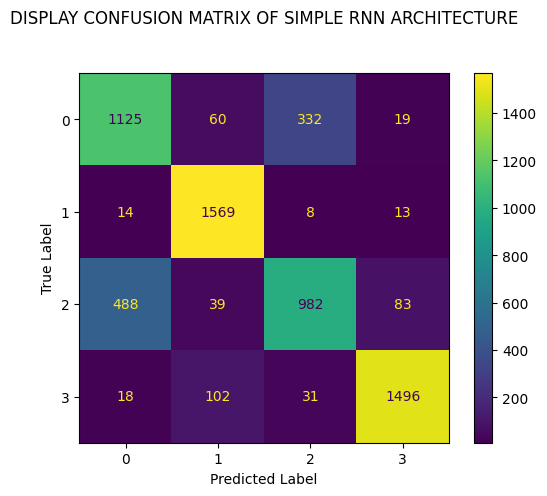

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have the y_pred_classes and y_true_classes arrays with predicted and true labels respectively.

# Calculate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Display the confusion matrix using ConfusionMatrixDisplay
classes = np.arange(cm.shape[0])  # Assuming your classes are integers from 0 to n_classes-1
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='viridis', values_format='d')

plt.title('DISPLAY CONFUSION MATRIX OF SIMPLE RNN ARCHITECTURE\n\n')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


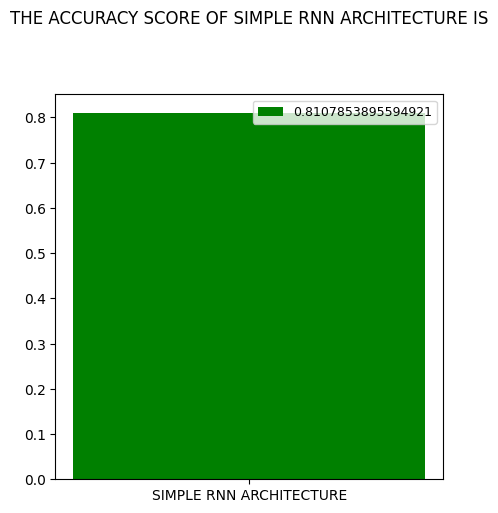

In [30]:
def graph():
    import matplotlib.pyplot as plt
    data=[AC]
    alg="SIMPLE RNN ARCHITECTURE"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("GREEN"))
    plt.title("THE ACCURACY SCORE OF SIMPLE RNN ARCHITECTURE IS\n\n\n")
    plt.legend(b,data,fontsize=9)
graph()